<a href="https://colab.research.google.com/github/JeffersonBP/DataScienceStudy/blob/main/ANALIZE_DE_CHAMDO_GERANDO_HTML_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

o codigo faz uma analise dos chamados finalizados e execultados e gera um HTML para ser enviado.

Mounted at /content/drive


<ipython-input-1-d17ec20e6356>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=chamados_por_categoria.index, y=chamados_por_categoria.values, palette="viridis")


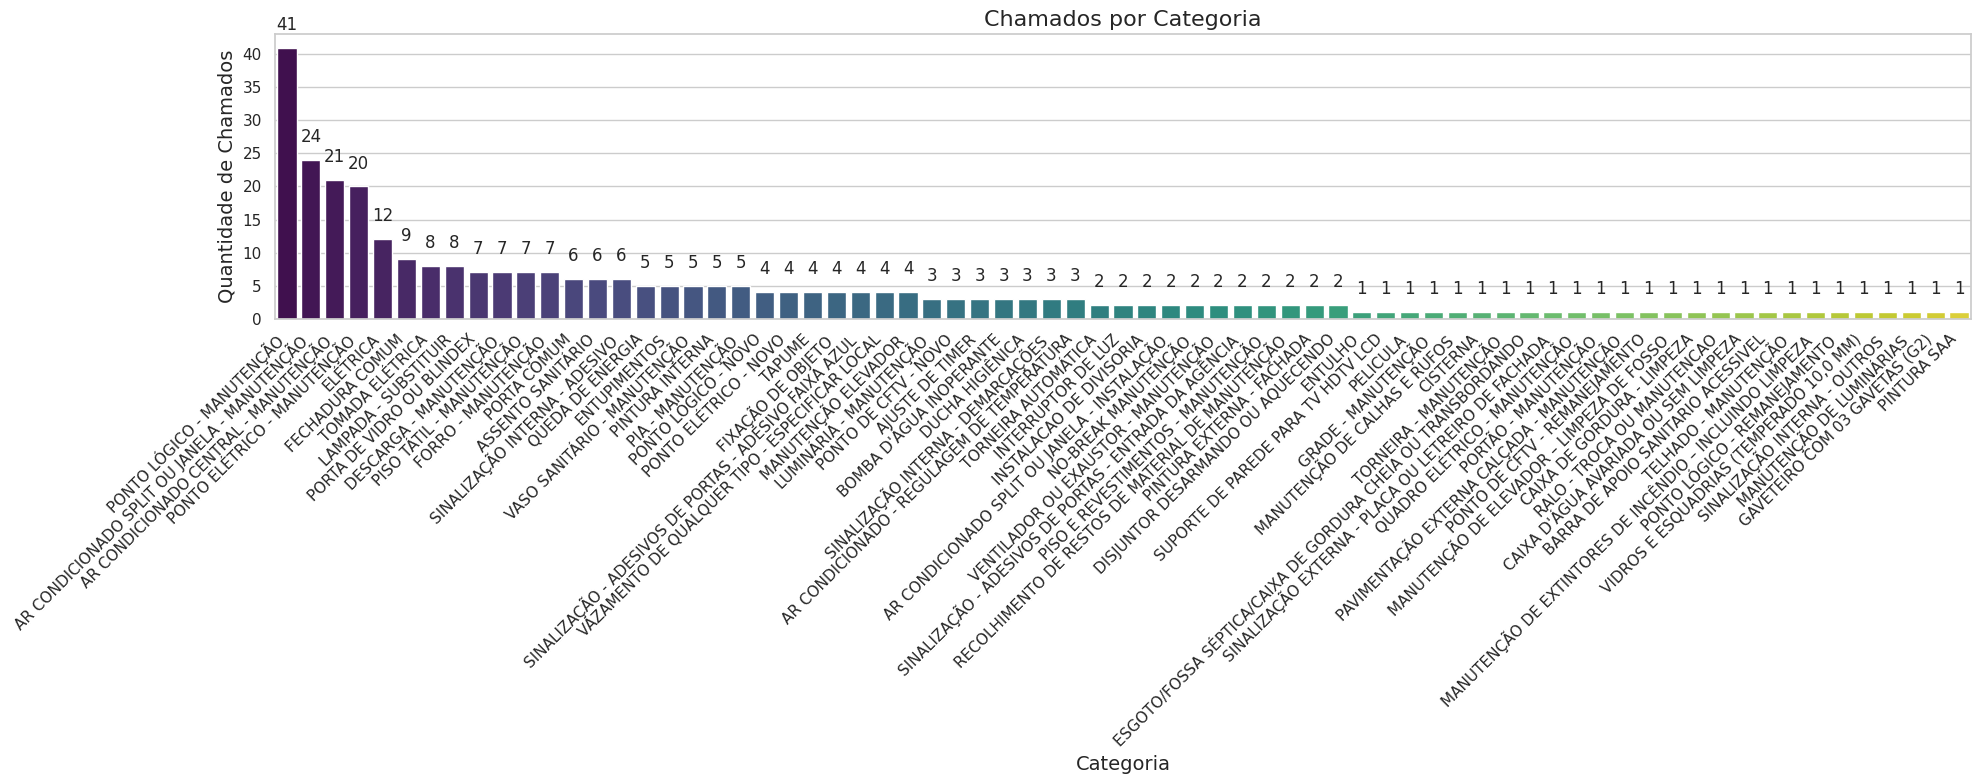

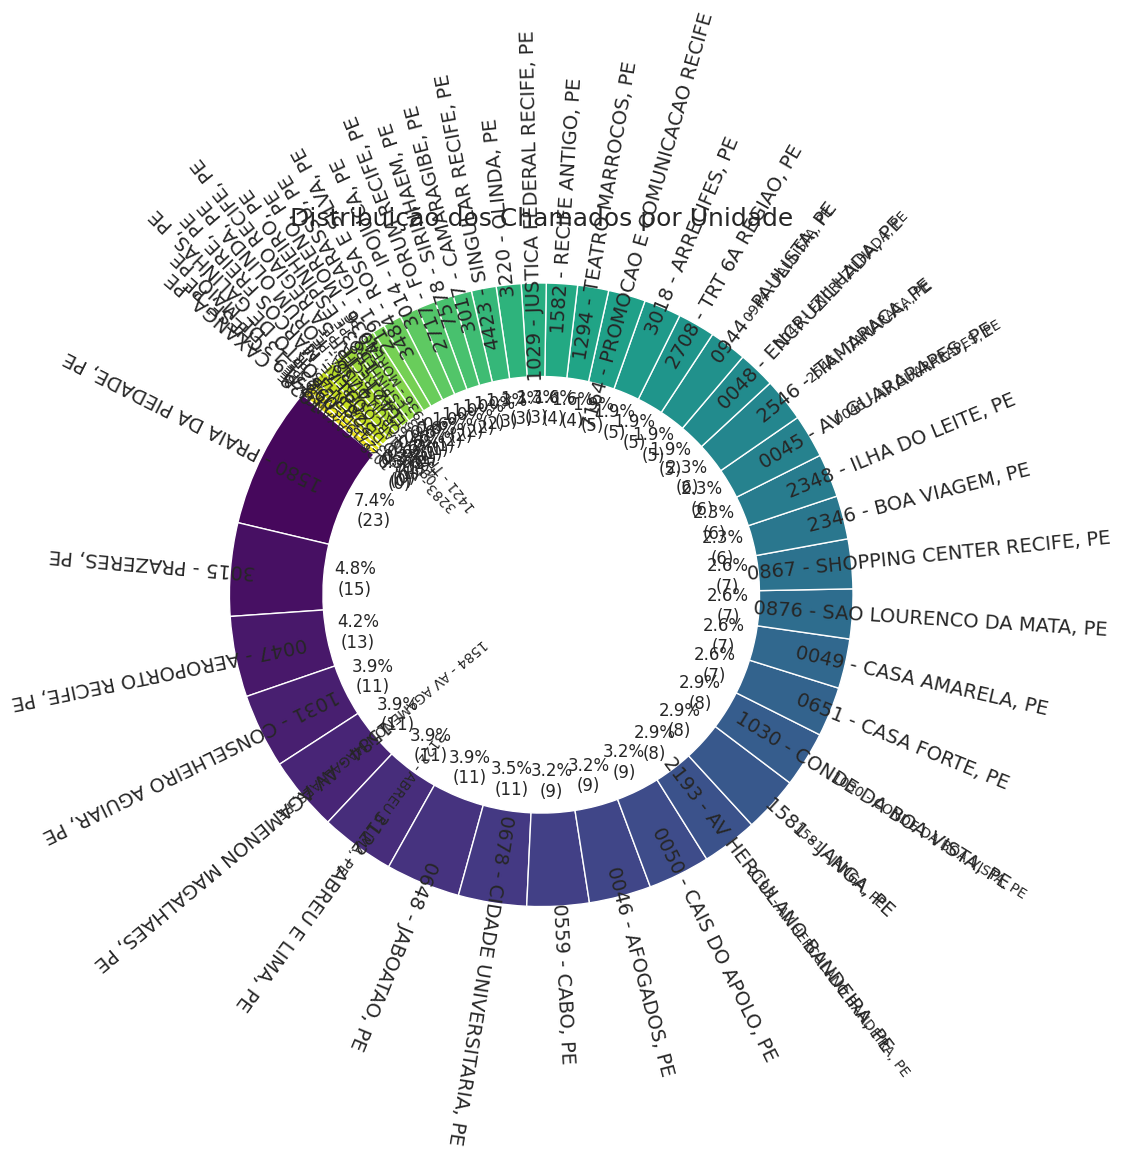

Unidade com mais chamados no mês: 1580 - PRAIA DA PIEDADE, PE

Descrições dos chamados de pintura mais frequentes:
Chamado
Solicitamos encaminhar profissional para fazer da pintura de parede e teto desta agência.">  Solicitamos encaminhar profissional para fazer da pintura de parede e teto desta agência...    Solicitamos encaminhar profissional para fazer da pintura de parede e teto desta agência...                                  1
Solicitamos enviar equipe para analise e pintura da parte superior da fachada da unidade ( concreto">  Solicitamos enviar equipe para analise e pintura da parte superior da fachada da unidade ( concreto..    Solicitamos enviar equipe para analise e pintura da parte superior da fachada da unidade ( concreto..    1
Em virtude da retirada do banner  CAIXA pra ELAS  , conforme orientação da CAIXA,  a parede ( prime">  Em virtude da retirada do banner  CAIXA pra ELAS  , conforme orientação da CAIXA,  a parede ( prime..    Em virtude da retirada do banner  CAIXA

In [1]:
                                                                                                                                                            import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Montar o Google Drive para acessar os arquivos
drive.mount('/content/drive')

# Caminho da planilha
caminho_planilha = '/content/drive/My Drive/worck/EQS ENGENHARIA/LOG CAIXA/Atendimento CAIXA.xlsx'

# Carregar a planilha
planilha = pd.read_excel(caminho_planilha)

# Contar a quantidade de chamados por unidade
chamados_por_unidade = planilha['Unidade'].value_counts()

# Separar os chamados por categoria na variável Item
chamados_por_categoria = planilha['Item'].value_counts()

# Filtrar os chamados de pintura
chamados_pintura = planilha[planilha['Item'].str.contains('Pintura', case=False, na=False)]

# Contar a frequência das descrições dos chamados de pintura
descricao_pintura = chamados_pintura['Chamado'].value_counts()

# Verificar a unidade que teve mais chamados no mês
unidade_com_mais_chamados = chamados_por_unidade.idxmax()

# Configurações de estilo do seaborn para os gráficos
sns.set(style="whitegrid")

# Plotar um gráfico de barras dos chamados por categoria
plt.figure(figsize=(20, 8))
ax = sns.barplot(x=chamados_por_categoria.index, y=chamados_por_categoria.values, palette="viridis")
plt.title('Chamados por Categoria', fontsize=16)
plt.xlabel('Categoria', fontsize=14)
plt.ylabel('Quantidade de Chamados', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Ajuste da rotação e alinhamento
plt.tight_layout()  # Ajusta automaticamente para que os elementos não se sobreponham

# Adicionar rótulos de dados no gráfico de barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', xytext=(0, 10), textcoords='offset points')

plt.show()

# Função para ajustar os rótulos do gráfico de pizza
def func(pct, allvalues):
    absolute = int(pct/100.*sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

plt.figure(figsize=(12, 12))  # Ajusta o tamanho da figura

# Plotar um gráfico de pizza dos chamados por unidade
wedges, texts, autotexts = plt.pie(chamados_por_unidade, autopct=lambda pct: func(pct, chamados_por_unidade),
                                   startangle=140, colors=sns.color_palette("viridis", len(chamados_por_unidade)),
                                   wedgeprops=dict(width=0.3, edgecolor='w'))

# Ajustar as legendas com setas e inclinação perpendicular à área associada
for i, (wedge, text) in enumerate(zip(wedges, texts)):
    text.set_fontsize(10)
    text.set_color('black')
    text.set_horizontalalignment('center')
    x, y = text.get_position()
    angle = (wedge.theta2 + wedge.theta1) / 2
    x = 1.3 * wedge.r * np.cos(np.deg2rad(angle))  # Ajusta a posição x para que as legendas não se sobreponham
    y = 1.3 * wedge.r * np.sin(np.deg2rad(angle))  # Ajusta a posição y para que as legendas não se sobreponham

    # Calcula a posição da seta
    arrow_x = 1.1 * wedge.r * np.cos(np.deg2rad(angle))
    arrow_y = 1.1 * wedge.r * np.sin(np.deg2rad(angle))

    # Ajusta a orientação da seta
    arrow_ha = 'left' if x > 0 else 'right'

    plt.annotate(
        chamados_por_unidade.index[i],
        xy=(x, y),
        xytext=(arrow_x, arrow_y),
        textcoords='data',
        ha=arrow_ha,
        va='center',
        fontsize=10,
        arrowprops=dict(facecolor='black', arrowstyle='->', connectionstyle='arc3,rad=0.2'),
        rotation=angle,
        rotation_mode='anchor'
    )

# Posicionar o título do gráfico de pizza de forma circular
r = 1.25  # Raio para o texto do título
for i, _ in enumerate(chamados_por_unidade):
    angle = (wedges[i].theta2 + wedges[i].theta1) / 2
    angle_rad = np.deg2rad(angle)
    x = r * np.cos(angle_rad)
    y = r * np.sin(angle_rad)
    plt.text(x, y, chamados_por_unidade.index[i], fontsize=14, ha='center', va='center', rotation=angle)

plt.title('Distribuição dos Chamados por Unidade', fontsize=18, pad=20)  # Ajusta o título e adiciona espaçamento
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()  # Ajusta automaticamente para que os elementos não se sobreponham
plt.show()

# Exibir a unidade que teve mais chamados
print("Unidade com mais chamados no mês:", unidade_com_mais_chamados)

# Exibir a descrição dos chamados de pintura mais frequentes
print("\nDescrições dos chamados de pintura mais frequentes:")
print(descricao_pintura.head())



In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import base64
from google.colab import drive

# Montar o Google Drive para acessar os arquivos
drive.mount('/content/drive')

# Caminho da planilha
caminho_planilha = '/content/drive/My Drive/worck/EQS ENGENHARIA/LOG CAIXA/Atendimento CAIXA.xlsx'

# Carregar a planilha
planilha = pd.read_excel(caminho_planilha)

# Contar a quantidade de chamados por unidade
chamados_por_unidade = planilha['Unidade'].value_counts()

# Separar os chamados por categoria na variável Item
chamados_por_categoria = planilha['Item'].value_counts()

# Filtrar os chamados de pintura
chamados_pintura = planilha[planilha['Item'].str.contains('Pintura', case=False, na=False)]

# Contar a frequência das descrições dos chamados de pintura
descricao_pintura = chamados_pintura['Chamado'].value_counts()

# Verificar a unidade que teve mais chamados no mês
unidade_com_mais_chamados = chamados_por_unidade.idxmax()

# Configurações de estilo do seaborn para os gráficos
sns.set(style="whitegrid")

# Plotar um gráfico de barras dos chamados por categoria
plt.figure(figsize=(20, 8))
ax = sns.barplot(x=chamados_por_categoria.index, y=chamados_por_categoria.values, palette="viridis")
plt.title('Chamados por Categoria', fontsize=16)
plt.xlabel('Categoria', fontsize=14)
plt.ylabel('Quantidade de Chamados', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Ajuste da rotação e alinhamento
plt.tight_layout()  # Ajusta automaticamente para que os elementos não se sobreponham
plt.savefig('/content/drive/My Drive/chamados_por_categoria.png') # Salva o gráfico em uma imagem
plt.close()

# Função para converter imagem em base64
def image_to_base64(image_path):
    with open(image_path, "rb") as img_file:
        return base64.b64encode(img_file.read()).decode("utf-8")

# Converter imagens em base64
base64_chamados_por_categoria = image_to_base64('/content/drive/My Drive/chamados_por_categoria.png')
base64_parte1_unidades = image_to_base64('/content/drive/My Drive/parte1_unidades.png')
base64_parte2_unidades = image_to_base64('/content/drive/My Drive/parte2_unidades.png')
base64_parte3_unidades = image_to_base64('/content/drive/My Drive/parte3_unidades.png')
base64_parte4_unidades = image_to_base64('/content/drive/My Drive/parte4_unidades.png')

# Criar o arquivo HTML
with open("/content/drive/My Drive/relatorio.html", "w") as arquivo:
    arquivo.write("<html><body>")
    arquivo.write("<h1>Relatório de Chamados</h1>")
    arquivo.write("<h2>Chamados por Categoria</h2>")
    arquivo.write("<img src='data:image/png;base64,{}' /><br>".format(base64_chamados_por_categoria))
    arquivo.write("<h2>25% das Unidades - Parte 1</h2>")
    arquivo.write("<img src='data:image/png;base64,{}' /><br>".format(base64_parte1_unidades))
    arquivo.write("<h2>25% das Unidades - Parte 2</h2>")
    arquivo.write("<img src='data:image/png;base64,{}' /><br>".format(base64_parte2_unidades))
    arquivo.write("<h2>25% das Unidades - Parte 3</h2>")
    arquivo.write("<img src='data:image/png;base64,{}' /><br>".format(base64_parte3_unidades))
    arquivo.write("<h2>25% das Unidades - Parte 4</h2>")
    arquivo.write("<img src='data:image/png;base64,{}' /><br>".format(base64_parte4_unidades))
    arquivo.write("</body></html>")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-8-fde8b6e2b16f>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=chamados_por_categoria.index, y=chamados_por_categoria.values, palette="viridis")
